**Problem Statement: The dataset train_exit.csv expected to train the model to predict the cricket player is selected or not, depending on the given independent features.Here we train and evaluate the accuracy of the model.**

# Import necessary library packages

In [130]:
import numpy as np #Numerical Operations
import pandas as pd #Data Manipulation
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization

# Load dataset into Python Environment

In [131]:
data = pd.read_csv("train_exit.csv")

In [132]:
data.head(10) # Display first few rows of data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
5,PLID_10351,Tandra Tijerina,21,M,Guinea,6'0,174lbs,63.0,69.0,65.0,...,Right,6.3,0.0,6.9,3.0,Medium,Academy,7.0,0.0,0
6,PLID_21799,Narcisa Garnes,24,F,China PR,5'10,148lbs,64.0,68.0,71.0,...,Left,6.9,1.0,7.3,2.0,High,Academy,10.0,0.0,0
7,PLID_20082,Joyce Boxx,21,F,United States,5'11,168lbs,58.0,60.0,57.0,...,Right,5.9,1.0,6.8,5.0,Medium,Talent Hunt,6.0,0.0,1
8,PLID_22917,Josette Mcgrew,25,M,Italy,6'0,176lbs,67.0,70.0,58.0,...,Right,6.9,0.0,8.2,2.0,Medium,Academy,11.0,0.0,1
9,PLID_9364,Hai Brandel,16,M,Belgium,6'2,183lbs,49.0,56.0,61.0,...,Right,4.7,0.0,6.1,2.0,Medium,Unknown,2.0,0.0,1


In [133]:
data.tail(10) #Display last few rows of data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
13984,PLID_20610,Luisa Graziano,24,M,Colombia,6'0,NaN,67.0,64.0,49.0,...,None,4.7,1.0,7.1,3.0,Medium,Unknown,9.0,0.0,0
13985,PLID_145,Carmina Reich,28,F,Chile,5'9,NaN,73.0,80.0,63.0,...,Right,5.3,0.0,NaN,5.0,High,Academy,14.0,0.0,0
13986,PLID_21441,Edna Towne,16,M,France,6'0,161lbs,66.0,75.0,68.0,...,NaN,7.1,1.0,8.2,7.0,Low,Talent Hunt,1.0,0.0,1
13987,PLID_19280,Phoebe Vancleve,25,F,Colombia,5'10,157lbs,70.0,79.0,66.0,...,None,6.4,1.0,8.2,3.0,High,Source,10.0,0.0,1
13988,PLID_7814,Deeann Fripp,16,M,England,5'11,157lbs,38.0,68.0,65.0,...,Right,4.5,NaN,5.5,4.0,Medium,Academy,1.0,0.0,0
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1
13993,PLID_236,Darius Schuman,16,F,Chile,5'8,159lbs,53.0,59.0,67.0,...,Right,4.2,0.0,6.7,0.0,Medium,Source,1.0,0.0,0


In [134]:
data.shape #Display no: of rows and columns respectively

(13994, 30)

In [135]:
data.columns #display column name/ feature names

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [136]:
data.info() #Display basic information like object type and entries of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [137]:
data.describe() # Statistical View

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [138]:
data.isnull().sum() #Null values in each feature

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

# Exploratory Data Analysis

In [139]:
data["gender"].value_counts() #value count of categorical values

M    6992
F    6983
Name: gender, dtype: int64

In [140]:
data["country"].value_counts()

England          1157
Germany           838
Spain             796
France            734
Argentina         691
                 ... 
New Caledonia       1
Afghanistan         1
Chad                1
Turkmenistan        1
Oman                1
Name: country, Length: 163, dtype: int64

In [141]:
data["strong_foot"].value_counts()

Right    8359
Left     2531
None     1281
Any      1271
Name: strong_foot, dtype: int64

In [142]:
data["dedication_level"].value_counts()

Medium    9704
High      3557
Low        733
Name: dedication_level, dtype: int64

In [143]:
data["coaching"].value_counts()

Academy        9390
Talent Hunt    1993
Unknown        1360
Source         1126
Name: coaching, dtype: int64

In [144]:
data["selection"].value_counts() #target feature

1    7802
0    6192
Name: selection, dtype: int64

<Axes: title={'center': 'target'}>

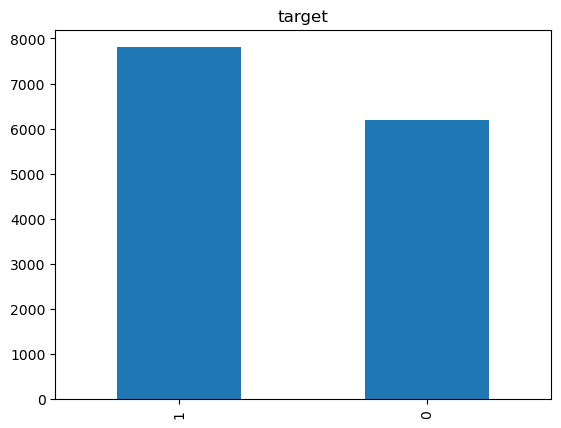

In [145]:
data["selection"].value_counts().plot.bar(title ="target")

<Axes: title={'center': 'strong_foot'}>

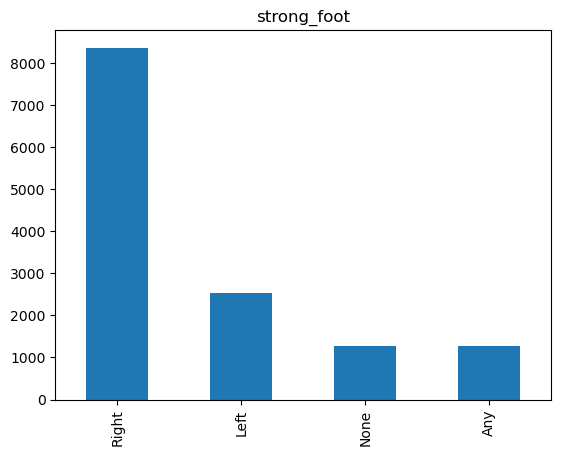

In [146]:
data["strong_foot"].value_counts().plot.bar(title ="strong_foot")

<Axes: title={'center': 'dedication_level'}>

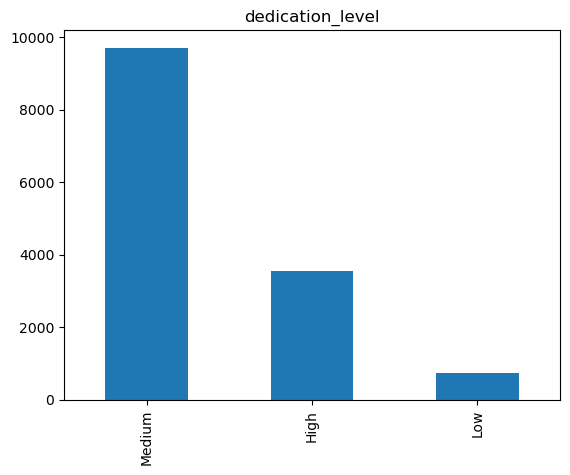

In [147]:
data["dedication_level"].value_counts().plot.bar(title ="dedication_level")

<Axes: title={'center': 'coaching'}>

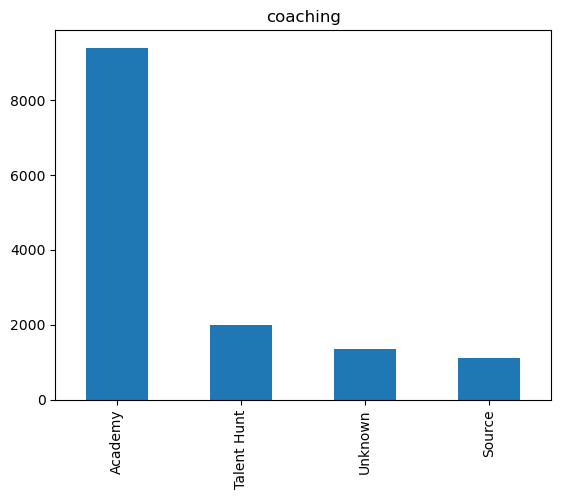

In [148]:
data["coaching"].value_counts().plot.bar(title ="coaching")

<Axes: xlabel='strong_foot', ylabel='count'>

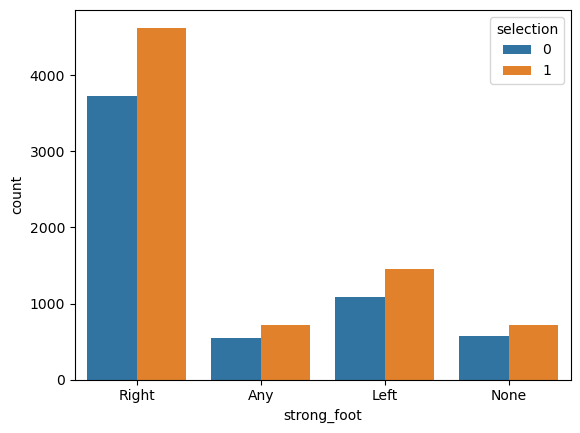

In [149]:
sns.countplot(data=data,x="strong_foot",hue ="selection")

<Axes: xlabel='dedication_level', ylabel='count'>

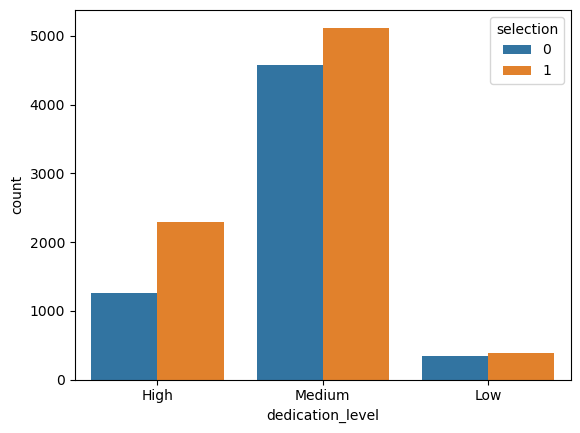

In [150]:
sns.countplot(data=data,x="dedication_level",hue ="selection")

<Axes: xlabel='coaching', ylabel='count'>

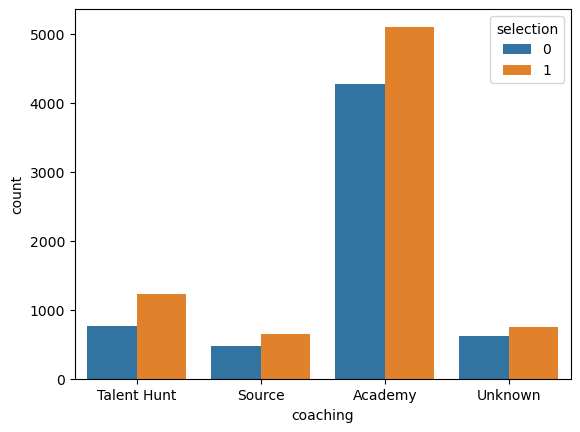

In [151]:
sns.countplot(data=data,x="coaching",hue ="selection")

<Axes: xlabel='age', ylabel='Count'>

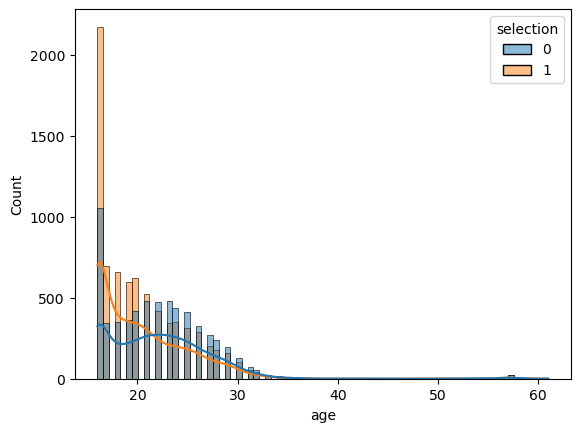

In [152]:
sns.histplot(data=data,x="age", hue="selection",kde=True )

<Axes: xlabel='height', ylabel='Count'>

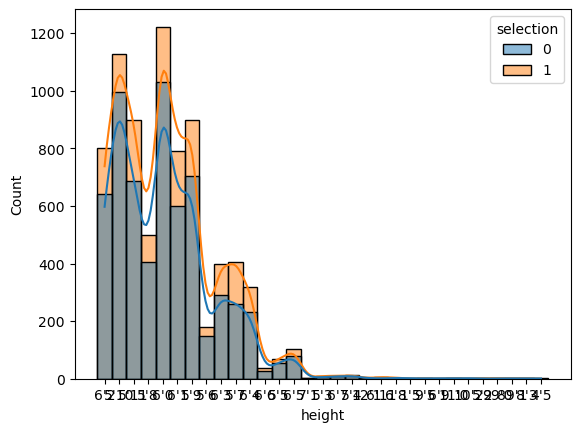

In [153]:
sns.histplot(data=data,x="height", hue="selection",kde=True )

<Axes: xlabel='weight', ylabel='Count'>

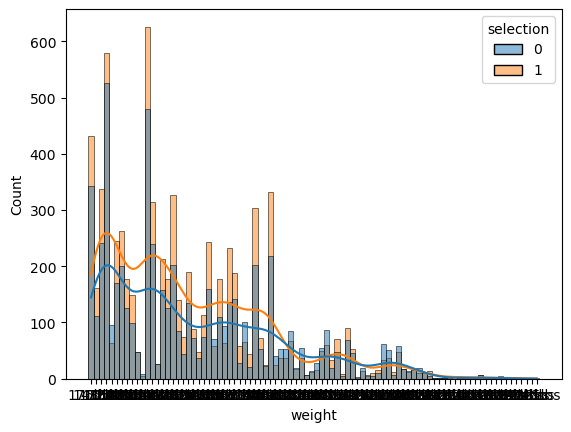

In [154]:
sns.histplot(data=data,x="weight", hue="selection",kde=True )

C:\Users\skshe\AppData\Local\Temp\ipykernel_18888\1096077704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,linewidths=0.9,annot_kws={"fontsize":8})


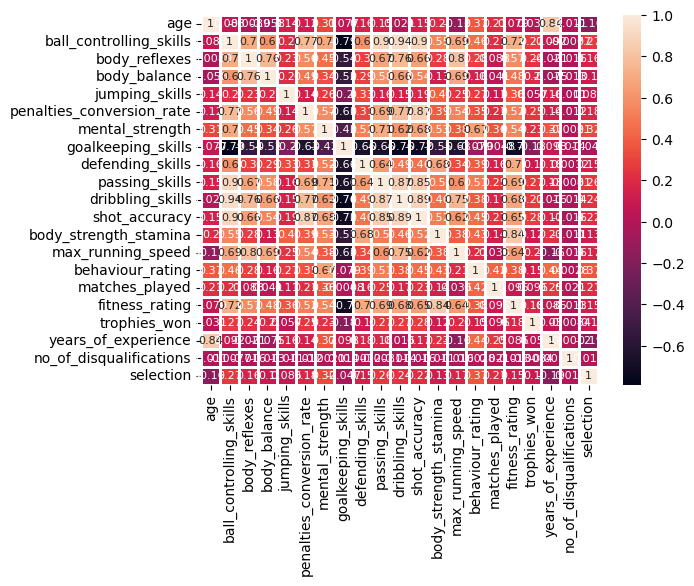

In [155]:
sns.heatmap(data.corr(),annot = True,linewidths=0.9,annot_kws={"fontsize":8})
plt.show()

In [156]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

# filling Null Values

In [157]:
data["gender"] = data["gender"].fillna(data["gender"].mode()[0])

In [158]:
data["weight"] = data["weight"].fillna(data["weight"].mode()[0])

In [159]:
data["ball_controlling_skills"] = data["ball_controlling_skills"].fillna(data["ball_controlling_skills"].mean())

In [160]:
data["jumping_skills"] = data["jumping_skills"].fillna(data["jumping_skills"].mean())

In [161]:
data["penalties_conversion_rate"] = data["penalties_conversion_rate"].fillna(data["penalties_conversion_rate"].mean())

In [162]:
data["mental_strength"] = data["mental_strength"].fillna(data["mental_strength"].mean())

In [163]:
data["shot_accuracy"] = data["shot_accuracy"].fillna(data["shot_accuracy"].mean())

In [164]:
data["strong_foot"] = data["strong_foot"].fillna(data["strong_foot"].mode()[0])

In [165]:
data["behaviour_rating"] = data["behaviour_rating"].fillna(data["behaviour_rating"].mean())

In [166]:
data["matches_played"] = data["matches_played"].fillna(data["matches_played"].median())

In [167]:
data["fitness_rating"] = data["fitness_rating"].fillna(data["fitness_rating"].median())

In [168]:
data["coaching"] = data["coaching"].fillna(data["coaching"].mode()[0])

In [169]:
data["years_of_experience"] = data["years_of_experience"].fillna(data["years_of_experience"].mean())

In [170]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

# Encoding of Data

In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
le= LabelEncoder()

In [175]:
data["gender"]= le.fit_transform(data["gender"])

In [176]:
data["gender"].value_counts()

1    7011
0    6983
Name: gender, dtype: int64

In [177]:
data["strong_foot"]= le.fit_transform(data["strong_foot"])

In [178]:
data["dedication_level"]= le.fit_transform(data["dedication_level"])

In [179]:
data["coaching"]= le.fit_transform(data["coaching"])

In [180]:
df= data.drop(["player_id","name","height","weight","country"],axis=1)

In [181]:
df

,age,gender,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,77.0,58.0,47.0,59.0,41.0,73.0,13.0,69.0,...,3,7.700000,0.0,8.1,2.0,0,2,8.0,0.0,1
1,18,1,54.0,69.0,70.0,62.0,53.0,43.0,10.0,30.0,...,0,5.300000,0.0,6.8,3.0,2,1,3.0,0.0,0
2,16,0,34.0,43.0,45.0,69.0,49.0,45.0,10.0,57.0,...,1,4.700000,0.0,6.6,5.0,1,0,2.0,0.0,1
3,27,1,79.0,73.0,76.0,86.0,81.0,80.0,3.0,85.0,...,3,8.600000,113.0,8.6,6.0,2,0,13.0,16.0,1
4,19,0,47.0,61.0,74.0,57.0,49.0,35.0,9.0,60.0,...,3,5.822068,0.0,5.7,5.0,2,0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,20,1,60.0,48.0,62.0,60.0,40.0,61.0,10.0,63.0,...,3,6.000000,0.0,7.6,2.0,2,0,6.0,0.0,1
13990,18,0,53.0,68.0,59.0,73.0,24.0,55.0,11.0,52.0,...,3,5.300000,0.0,5.6,3.0,2,0,4.0,0.0,0
13991,17,1,56.0,73.0,62.0,50.0,47.0,64.0,10.0,58.0,...,1,5.700000,0.0,7.7,3.0,1,2,2.0,0.0,1
13992,20,0,71.0,69.0,70.0,51.0,56.0,59.0,9.0,42.0,...,1,6.800000,1.0,5.8,4.0,2,0,6.0,0.0,1


# Scaling

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scale = MinMaxScaler()

In [184]:
Y= df["selection"]

In [185]:
X = df.drop("selection",axis =1)

In [186]:
X = scale.fit_transform(X)

# Model Selection

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state =42)

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf= RandomForestClassifier()

In [191]:
model = rf.fit(xtrain,ytrain)

In [192]:
y_prediction = model.predict(xtest)

In [193]:
y_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [195]:
con_matrix = confusion_matrix(y_prediction,ytest)

In [196]:
con_matrix

array([[1056,  184],
       [ 230, 1329]], dtype=int64)

In [197]:
acc = accuracy_score(y_prediction,ytest)

In [198]:
acc

0.8520900321543409

In [199]:
p = precision_score(y_prediction,ytest)

In [200]:
p

0.8783873099801719

In [201]:
r = recall_score(y_prediction,ytest)

In [202]:
r

0.8524695317511225

In [203]:
f1 = f1_score(y_prediction,ytest)

In [204]:
f1

0.8652343750000001

**The model is evaluated and trained with RandomForestClassifier with an accuracy of 0.85, which is a best fit model.**